# Tugas Mandiri
# Pertemuan 5 Semester 7

Buatlah sebuah proyek Data Science menggunakan metode CRISP-DM dengan ketentuan sebagai berikut:
1. Cari dataset yang bersumber dari open data seperti Open Data Jabar, Kaggle, dan lain-lain.
2. Beri tujuan pembuatan proyek dan deskripsi dari dataset yang telah dicari.
3. Beri penjelasan untuk setiap tahap CRISP-DM yang dilakukan. Tahapan dibuat dari business understanding hingga deployment.
4. Proyek data science yang dibuat mengacu pada SKKNI No. 299 Tahun 2020.

## 50421643_Ilham Rizkyansyah_Kelas C

# DATASET WISATA JAWA BARAT

### Dataset
“disparbud-od_15387_jml_ptns_obyek_daya_tarik_wisata_odtw__jenis_kabup_v2_data.csv” berisi informasi tentang jumlah daya tarik wisata di berbagai kabupaten dan kota di Indonesia, khususnya di Provinsi Jawa Barat.

### Kolom Utama:
- **id** : Pengenal unik untuk setiap entri.
- **kode_provinsi** : Kode yang mewakili provinsi (dalam hal ini Jawa Barat diwakili oleh angka 32).
- **nama_provinsi** : Nama provinsi (JAWA BARAT).
- **kode_kabupaten_kota** : Kode yang mewakili distrik atau kota tertentu.
- **nama_kabupaten_kota** : Nama kabupaten atau kota dalam provinsi.
- **jenis_odtw** : Jenis objek wisata (misalnya alam, budaya, dan lain-lain).
- **jumlah_odtw** : Jumlah objek wisata dengan tipe tertentu di kabupaten/kota tersebut.
- **satuan** : Satuan ukuran, yang menunjukkan bahwa hitungannya berdasarkan jumlah lokasi.
- **tahun** : Tahun data dikumpulkan.
Contoh Entri:
Misalnya saja pada tahun 2014, Kabupaten Bogor memiliki 38 objek wisata alam (ALAM) .

Kumpulan data ini berguna untuk menganalisis tren pariwisata di berbagai wilayah dan jenis objek wisata, yang dapat membantu dalam upaya perencanaan dan pengembangan pariwisata regional.

Kita akan mulai dengan memuat dataset dan memahami strukturnya.

In [17]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import numpy as np

# Load dataset
file_path = 'disparbud-od_15387_jml_ptns_obyek_daya_tarik_wisata_odtw__jenis_kabup_v2_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_odtw,jumlah_odtw,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,ALAM,38,LOKASI,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BUDAYA,3,LOKASI,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,MINAT KHUSUS,4,LOKASI,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,ALAM,36,LOKASI,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,BUDAYA,7,LOKASI,2014


## UNDERSTANDING DATA

Sekarang, mari kita lihat beberapa informasi dasar tentang kumpulan data, termasuk strukturnya, nilai yang hilang, dan statistik deskriptif.

In [18]:
# Display dataset info
data.info()

# Display descriptive statistics
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   807 non-null    int64 
 1   kode_provinsi        807 non-null    int64 
 2   nama_provinsi        807 non-null    object
 3   kode_kabupaten_kota  807 non-null    int64 
 4   nama_kabupaten_kota  807 non-null    object
 5   jenis_odtw           807 non-null    object
 6   jumlah_odtw          807 non-null    int64 
 7   satuan               807 non-null    object
 8   tahun                807 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 56.9+ KB


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_odtw,jumlah_odtw,satuan,tahun
count,807.000000,807.0,807,807.000000,807,807,807.000000,807,807.000000
unique,NaN,NaN,1,NaN,27,4,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KABUPATEN BOGOR,ALAM,NaN,LOKASI,NaN
freq,NaN,NaN,807,NaN,30,269,NaN,807,NaN
mean,404.000000,32.0,NaN,3231.382900,NaN,NaN,23.182156,NaN,2018.516729
std,233.105126,0.0,NaN,31.268561,NaN,NaN,37.451743,NaN,2.866233
min,1.000000,32.0,NaN,3201.000000,NaN,NaN,0.000000,NaN,2014.000000
25%,202.500000,32.0,NaN,3207.000000,NaN,NaN,3.000000,NaN,2016.000000
50%,404.000000,32.0,NaN,3214.000000,NaN,NaN,9.000000,NaN,2019.000000
75%,605.500000,32.0,NaN,3273.000000,NaN,NaN,28.000000,NaN,2021.000000


### Memeriksa Nilai yang Hilang (NaN)

In [19]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jenis_odtw,0
jumlah_odtw,0
satuan,0
tahun,0


## DATA PREPARATION

Untuk memastikan kumpulan data siap untuk dianalisis, kami akan menangani nilai yang hilang, mengodekan variabel kategoris, dan memangkas outlier.

### Menangani Nilai yang Hilang

In [20]:
# Fill missing values with 0
data = data.fillna(0)

# Verify no missing values remain
data.isnull().sum()

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
jenis_odtw,0
jumlah_odtw,0
satuan,0
tahun,0


### Pengkodean Variabel Kategorial

Untuk kolom nama_provinsi, kita akan menggunakan pengkodean label untuk mengubah nilai teks menjadi nilai numerik.

In [21]:
# Label Encoding for 'nama_provinsi' column
le = LabelEncoder()
data['nama_provinsi'] = le.fit_transform(data['nama_provinsi'])

# Display the first few rows after encoding
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_odtw,jumlah_odtw,satuan,tahun
0,1,32,0,3201,KABUPATEN BOGOR,ALAM,38,LOKASI,2014
1,2,32,0,3201,KABUPATEN BOGOR,BUDAYA,3,LOKASI,2014
2,3,32,0,3201,KABUPATEN BOGOR,MINAT KHUSUS,4,LOKASI,2014
3,4,32,0,3202,KABUPATEN SUKABUMI,ALAM,36,LOKASI,2014
4,5,32,0,3202,KABUPATEN SUKABUMI,BUDAYA,7,LOKASI,2014


### Pemangkasan Outlier

Kami akan menggunakan metode Interquartile Range (IQR) untuk mendeteksi dan menghilangkan outlier di kolom jumlah_odtw.

In [22]:
# Trimming outliers using IQR method
Q1 = data['jumlah_odtw'].quantile(0.25)
Q3 = data['jumlah_odtw'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['jumlah_odtw'] >= lower_bound) & (data['jumlah_odtw'] <= upper_bound)]

# Display dataset after outlier removal
data.describe()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,jumlah_odtw,tahun
count,728.000000,728.0,728.0,728.000000,728.000000,728.000000
mean,387.315934,32.0,0.0,3233.776099,13.482143,2018.288462
std,234.388617,0.0,0.0,31.869112,15.713116,2.865491
min,1.000000,32.0,0.0,3201.000000,0.000000,2014.000000
25%,183.750000,32.0,0.0,3208.000000,2.000000,2016.000000
50%,374.500000,32.0,0.0,3215.000000,7.000000,2018.000000
75%,590.250000,32.0,0.0,3273.000000,19.000000,2021.000000
max,807.000000,32.0,0.0,3279.000000,65.000000,2023.000000


## Visualisasi Data

Mari kita visualisasikan distribusi jenis_odtw dan periksa distribusi jumlah_odtwmenggunakan boxplot.

### Histogram dari jenis_odtw

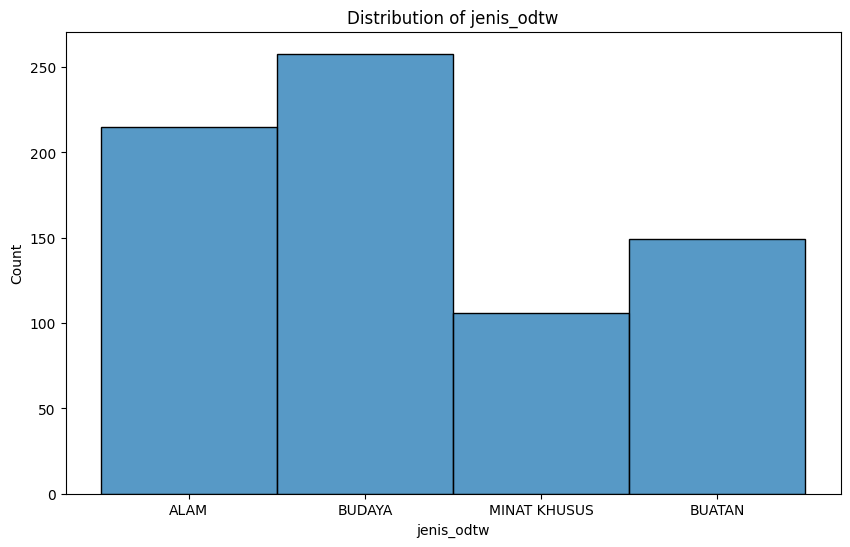

In [23]:
# Visualizing 'jenis_odtw'
plt.figure(figsize=(10, 6))
sns.histplot(data['jenis_odtw'])
plt.title('Distribution of jenis_odtw')
plt.show()

### Kotak diagram dari jumlah_odtw

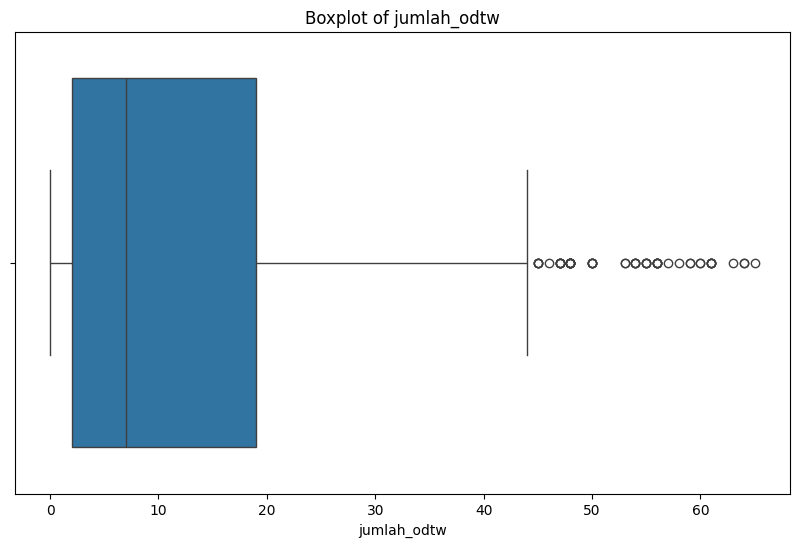

In [24]:
# Visualizing outliers in 'jumlah_odtw'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['jumlah_odtw'])
plt.title('Boxplot of jumlah_odtw')
plt.show()

## Pemodelan: Regresi Linier

Selanjutnya, kita akan menerapkan model Regresi Linier sederhana untuk memprediksi jumlah ODTW ( jumlah_odtw).

### Pemilihan Fitur dan Pemisahan Data

In [25]:
# Selecting features and target
X = data[['kode_provinsi', 'kode_kabupaten_kota']]
y = data['jumlah_odtw']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Menyesuaikan Model Regresi Linier

In [26]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

## Evaluasi Model

Mari mengevaluasi model menggunakan beberapa metrik seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R2).

In [27]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 11.31983640908157
MSE: 227.56585283998461
RMSE: 15.085285971435365
R2: 0.11294289473121055


### Memvisualisasikan Aktual vs. Prediksi

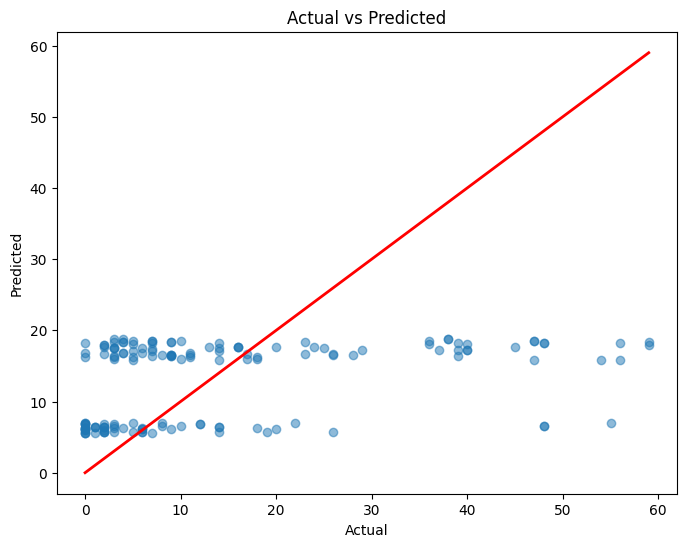

In [28]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Pengelompokan: K-Means

Terakhir, kami menerapkan pengelompokan K-Means untuk mengelompokkannya jumlah_odtw ke dalam klaster.

In [29]:
# Scaling the 'jumlah_odtw' column
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['jumlah_odtw']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Display the clustering results
data[['jumlah_odtw', 'cluster']].head()

,jumlah_odtw,cluster
0,38,1
1,3,0
2,4,0
3,36,1
4,7,0


### Memvisualisasikan Cluster

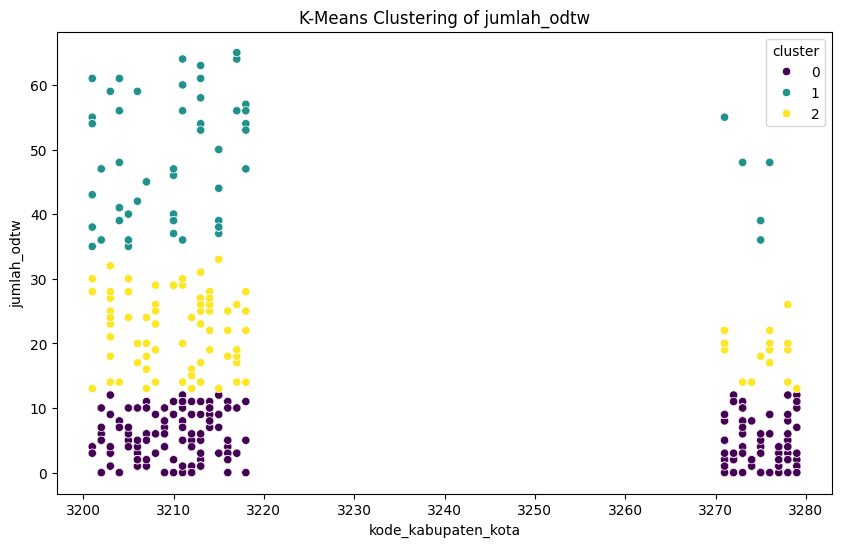

In [30]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kode_kabupaten_kota', y='jumlah_odtw', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of jumlah_odtw')
plt.show()

Notebook ini membahas tentang pemuatan dan pemahaman himpunan data, penanganan nilai yang hilang dan outlier, visualisasi aspek utama, penerapan model regresi linier, dan pengelompokan data dengan K-Means.